In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [57]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(3)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0
2,2,3PT,53.0,3,NaN,0.0,0,0,1,0,...,0,67.5,27.3,10.2,0,-1.77,1749.0,4,Down,0


In [58]:
#info 정보보기. 
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### 입원일자 데이터 타입 변환
- int, float -> str(object)
- object -> int or float (소수점 있을 경우 float)

In [59]:
df_ROS['입원일자']=df_ROS['입원일자'].astype(str)
df_ROS.dtypes

Unnamed: 0                  int64
환자ID                       object
Large Lymphocyte          float64
Location of herniation      int64
ODI                       float64
가족력                       float64
간질성폐질환                      int64
고혈압여부                       int64
과거수술횟수                      int64
당뇨여부                        int64
말초동맥질환여부                    int64
빈혈여부                        int64
성별                          int64
스테로이드치료                     int64
신부전여부                       int64
신장                          int64
심혈관질환                       int64
암발병여부                       int64
연령                          int64
우울증여부                       int64
입원기간                        int64
입원일자                       object
종양진행여부                      int64
직업                         object
체중                        float64
퇴원일자                        int64
헤모글로빈수치                   float64
혈전합병증여부                     int64
환자통증정도                      int64
흡연여부          

In [60]:
#날짜를 기준으로 describe() 하면 안나오니, include = object를 하면 날짜에 관련된 내용 나옴 
df_ROS.describe(include = object)

,환자ID,입원일자,직업,수술기법,혈액형,척추이동척도
count,1894,1894,1479,1813,1894,1894
unique,1894,1051,17,2,4,5
top,1PT,20190129,사무직,TELD,RH+A,Middle
freq,1,23,449,1673,688,1260


In [61]:
df_ROS['입원일자_datetime'] = pd.to_datetime(df_ROS['입원일자'])

In [62]:
df_ROS['입원일자_datetime'][:10]

0   2019-07-13
1   2019-07-15
2   2019-07-29
3   2019-07-31
4   2019-09-03
5   2019-09-05
6   2019-06-22
7   2019-03-30
8   2019-12-03
9   2019-12-10
Name: 입원일자_datetime, dtype: datetime64[ns]

In [14]:
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,입원일자_datetime,입원일자_datetime_week,퇴원일자_datetime
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,14.4,0,-1.01,2048.5,4,Down,0,1970-01-01 00:00:00.020190713,1,1970-01-01 00:00:00.020190716
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,17.8,0,-1.14,1753.1,4,Up,0,1970-01-01 00:00:00.020190715,1,1970-01-01 00:00:00.020190716


### 주차별 입원일자_datetime_week

In [15]:
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.isocalendar().week
df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.isocalendar().week

In [19]:
pivot_table1 = pd.pivot_table(data=df_ROS, index='입원일자_datetime', values='입원일자_datetime_week', aggfunc='count')
pivot_table2 = pd.pivot_table(data=df_ROS, index='퇴원일자_datetime', values='입원일자_datetime_week', aggfunc='count')

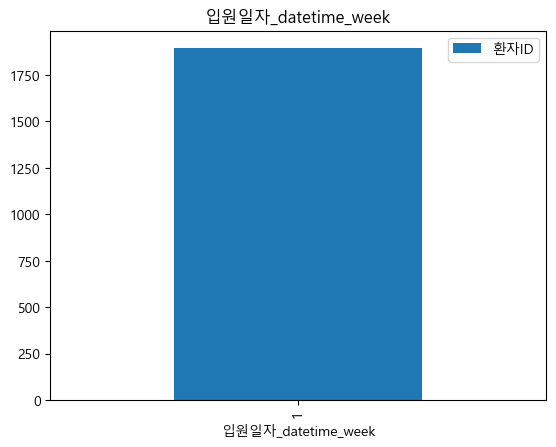

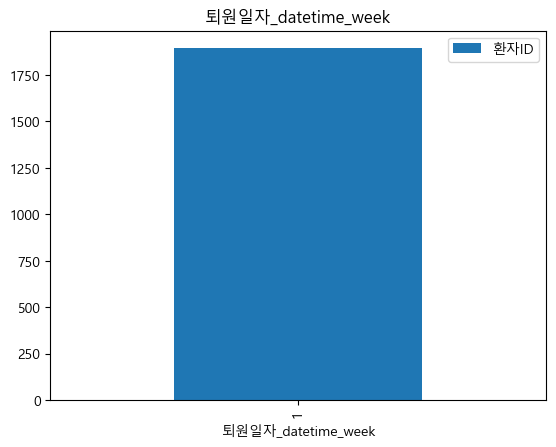

In [42]:
pivot_table1.plot(kind='bar', title='입원일자_datetime_week')
pivot_table2.plot(kind='bar', title='퇴원일자_datetime_week')
plt.show()

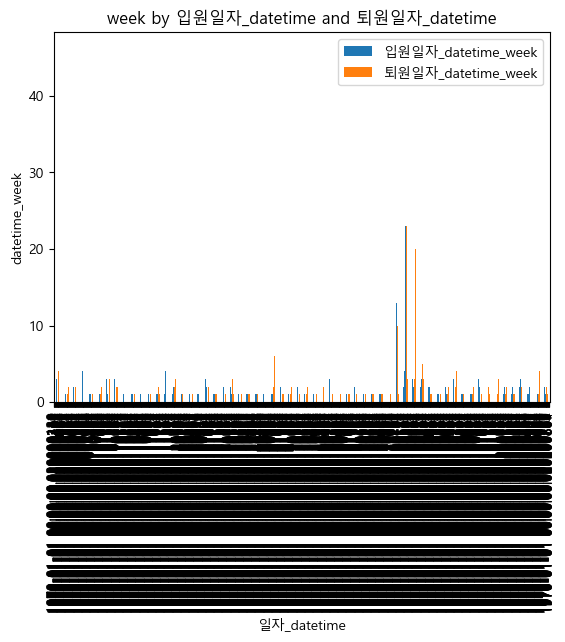

In [45]:
pivot_table_admission = pd.pivot_table(data=df_ROS, index='입원일자_datetime', values='입원일자_datetime_week', aggfunc='count')
pivot_table_discharge = pd.pivot_table(data=df_ROS, index='퇴원일자_datetime', values='퇴원일자_datetime_week', aggfunc='count')

# Merge the pivot tables on the common week index
merged_pivot = pd.concat([pivot_table_admission, pivot_table_discharge], axis=1)
merged_pivot.columns = ['입원일자_datetime_week', '퇴원일자_datetime_week']

# Plot the merged pivot table
merged_pivot.plot(kind='bar')
plt.title('week by 입원일자_datetime and 퇴원일자_datetime')
plt.xlabel('일자_datetime')
plt.ylabel('datetime_week')

# Show the plot
plt.show()

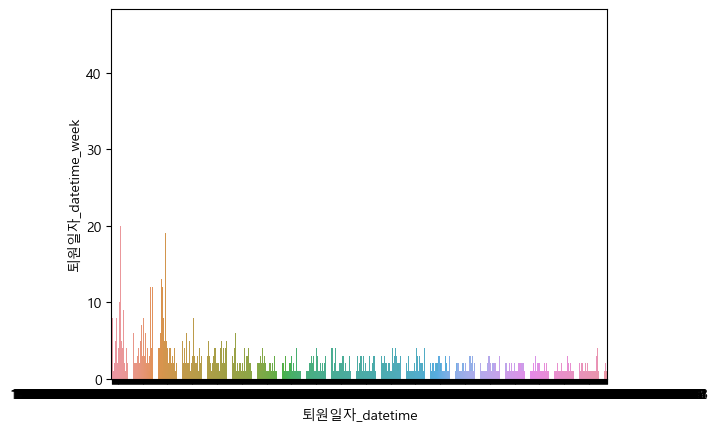

In [43]:
# 2차 방법(단순 시각화)
sns.barplot(data=df_ROS, x='입원일자_datetime', y='입원일자_datetime_week', estimator=sum)
sns.barplot(data=df_ROS, x='퇴원일자_datetime', y='퇴원일자_datetime_week', estimator=sum)

plt.show()

In [52]:
# 주말 출력
df_ROS['입원일자_datetime_week'] = df_ROS['입원일자_datetime'].dt.isocalendar().week
df_ROS['퇴원일자_datetime_week'] = df_ROS['퇴원일자_datetime'].dt.isocalendar().week

<Axes: xlabel='입원일자_datetime', ylabel='입원일자_datetime_week'>

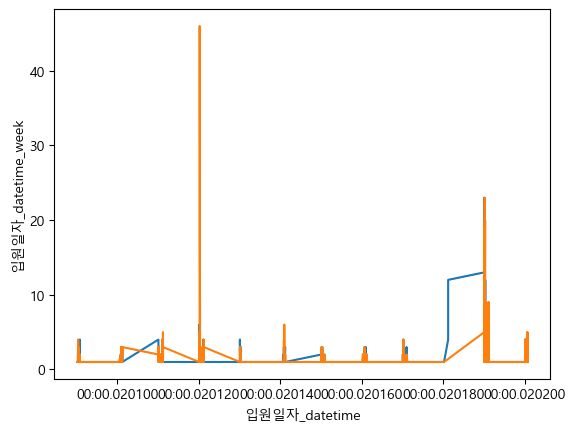

In [55]:
sns.lineplot(data=df_ROS, x='입원일자_datetime', y='입원일자_datetime_week', estimator=sum)
sns.lineplot(data=df_ROS, x='퇴원일자_datetime', y='퇴원일자_datetime_week', estimator=sum)

### 요일별 입퇴원일자 시각화 